In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading data

In [2]:
state_minwage_df = pd.read_excel("state_min_wage_rates.xlsx")
state_minwage_df.head()

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,jurisdiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Federal (FLSA),7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
2,Alabama,...,...,...,...,...,...,...,...,...,...,...
3,Alaska,7.75,8.75,9.75,9.8,9.84,10.19,10.19,10.34,10.34,10.85,11.73
4,Arizona,7.9,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35


In [3]:
# dropping rows that wont be used
state_minwage_df.drop(0, inplace=True)

In [4]:
state_minwage_df.head(10)

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Federal (FLSA),7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
2,Alabama,...,...,...,...,...,...,...,...,...,...,...
3,Alaska,7.75,8.75,9.75,9.8,9.84,10.19,10.19,10.34,10.34,10.85,11.73
4,Arizona,7.9,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35
5,Arkansas,6.25[c],7.50[c],8.00[c],8.50[c],8.50[c],9.25[c],10.00[c],11,11,11,11
6,California,9,9,10,10,11,12,12,13,14,15.5,16
7,Colorado,8,8.23,8.31,9.3,10.2,12,12.02,12.32,12.56,13.65,14.42
8,Connecticut,8.7,9.15,9.6,10.1,10.1,11,12,13,14,15,15.69
9,Delaware,7.75,8.25,8.25,8.25,8.25,9.25,9.25,9.25,10.5,11.75,13.25
10,Florida,7.93,8.05,8.05,8.1,8.25,8.56,8.56,10,10,12,12


In [5]:
state_minwage_df.columns

Index(['State or other',             2014,             2015,             2016,
                   2017,             2018,             2019,             2020,
                   2021,             2022,             2023,             2024],
      dtype='object')

### control state selection

In [6]:
state_minwage_df[2024] = pd.to_numeric(state_minwage_df[2024], errors="coerce")
# some values are .., so we coerce
state_minwage_df[state_minwage_df[2024] < 8]

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Federal (FLSA),7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
13,Idaho,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
16,Iowa,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
17,Kansas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
18,Kentucky,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
30,New Hampshire,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
34,North Carolina,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
35,North Dakota,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
39,Pennsylvania,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
44,Texas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25


> So I think these will be our control states, since they havent made any changes

### treatment state selection

In [7]:
state_minwage_df[state_minwage_df[2024] > 12]

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
4,Arizona,7.9,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35
6,California,9,9,10,10,11,12,12,13,14,15.5,16.00
7,Colorado,8,8.23,8.31,9.3,10.2,12,12.02,12.32,12.56,13.65,14.42
8,Connecticut,8.7,9.15,9.6,10.1,10.1,11,12,13,14,15,15.69
9,Delaware,7.75,8.25,8.25,8.25,8.25,9.25,9.25,9.25,10.5,11.75,13.25
12,Hawaii,7.25,7.75,8.5,9.25,10.1,10.1,10.1,10.1,12,12,14.00
20,Maine,7.5,7.5,7.5,9,10,12,12,12.15,12.75,13.8,14.15
21,Maryland,7.25,8.25,8.75,8.75,10.1,11,11,11.75,12.5,13.25,15.00
22,Massachusetts,8,9,10,11,11,12.75,12.75,13.5,14.25,15,15.00
26,Missouri,7.5,7.65,7.65,7.7,7.85,9.45,9.45,10.3,11.15,12,12.30


> maybe it would be best to observe the states who also start at around $7.25

> Possible Treatment States: Arizona, Delaware, Hawaii,  Maine, Maryland, New Jersey

In [8]:
state_minwage_df[state_minwage_df["State or other"] == "Florida"]

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10,Florida,7.93,8.05,8.05,8.1,8.25,8.56,8.56,10,10,12,12.0


# State gdp data loading

In [9]:
# CONTROLS
kansas = pd.read_csv("./state_summarydata/control/kansas.csv")
kentucky = pd.read_csv("./state_summarydata/control/kentucky.csv")
newhampshire = pd.read_csv("./state_summarydata/control/newhampshire.csv")
northcarolina = pd.read_csv("./state_summarydata/control/northcarolina.csv")
pennsylvania = pd.read_csv("./state_summarydata/control/pennsylvania.csv")
texas = pd.read_csv("./state_summarydata/control/texas.csv")
utah = pd.read_csv("./state_summarydata/control/utah.csv")
wisconsin = pd.read_csv("./state_summarydata/control/wisconsin.csv")
control_df = pd.concat(
    [
        kansas,
        kentucky,
        newhampshire,
        northcarolina,
        pennsylvania,
        texas,
        utah,
        wisconsin,
    ],
    ignore_index=True,
)

control_df.tail()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
115,"""55000""",Wisconsin,3,SASUMMARY,11,...,Per capita disposable personal income 7/,Dollars,23210,23981,...,40512.000,40985.000,42755.00,44955.000,46369.000,49613.000,53747.000,53817.000,57640.000,60098
116,"""55000""",Wisconsin,3,SASUMMARY,12,...,Per capita personal consumption expenditures ...,Dollars,20564,21823,...,36628.000,37575.000,39052.00,40430.000,41504.000,40496.000,45690.000,49930.000,52593.000,(NA)
117,"""55000""",Wisconsin,3,SASUMMARY,13,...,Regional price parities (RPPs) 9/,Index,(NA),(NA),...,93.314,93.234,93.54,93.951,94.472,92.665,93.293,92.416,93.097,(NA)
118,"""55000""",Wisconsin,3,SASUMMARY,14,...,Implicit regional price deflator 10/,Index,(NA),(NA),...,90.794,91.634,93.54,95.874,97.787,96.966,101.663,107.304,112.174,(NA)
119,"""55000""",Wisconsin,3,SASUMMARY,15,...,Total employment (number of jobs),Number of jobs,3287793,3350388,...,3624473.000,3657732.000,3678859.00,3721096.000,3717587.000,3580658.000,3682359.000,3775679.000,3855150.000,(NA)


In [10]:
# TREATMENT
arizona = pd.read_csv("./state_summarydata/treatment/arizona.csv")
delaware = pd.read_csv("./state_summarydata/treatment/delaware.csv")
hawaii = pd.read_csv("./state_summarydata/treatment/hawaii.csv")
maine = pd.read_csv("./state_summarydata/treatment/maine.csv")
maryland = pd.read_csv("./state_summarydata/treatment/maryland.csv")
newjersey = pd.read_csv("./state_summarydata/treatment/newjersy.csv")

treated_df = pd.concat(
    [arizona, delaware, hawaii, maine, maryland, newjersey],
    ignore_index=True,
)

treated_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"""04000""",Arizona,6,SASUMMARY,1,...,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,197492.1,214293.9,...,308582.8,319008.4,333099.0,346398.3,359576.7,365027.7,395035.9,410228.4,422399.6,433763.2
1,"""04000""",Arizona,6,SASUMMARY,2,...,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,(NA),(NA),...,281347.5,289273.8,304434.3,318218.3,333868.0,361266.1,394399.4,374592.8,381769.1,(NA)
2,"""04000""",Arizona,6,SASUMMARY,3,...,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,(NA),(NA),...,246519.2,251483.4,264659.3,275644.2,283289.2,281220.9,318965.7,321902.1,328923.0,(NA)
3,"""04000""",Arizona,6,SASUMMARY,4,...,Gross domestic product (GDP),Millions of current dollars,144393.2,156442.1,...,298942.2,313787.1,333099.0,353671.0,375376.7,388956.7,436778.6,484052.2,522767.2,552167.0
4,"""04000""",Arizona,6,SASUMMARY,5,...,Personal income,Millions of current dollars,117835.0,124922.3,...,267474.1,279696.7,297261.5,315459.0,337257.2,374007.2,414355.4,434338.9,464774.9,488730.4


In [11]:
# dropping unnecessary columns
# industry classification was all ...
control_df = control_df.drop(
    ["GeoFIPS", "Region", "TableName", "LineCode", "IndustryClassification"], axis=1
)
treated_df = treated_df.drop(
    ["GeoFIPS", "Region", "TableName", "LineCode", "IndustryClassification"], axis=1
)

In [12]:
control_df.columns

Index(['GeoName', 'Description', 'Unit', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [13]:
# filter to only include same years as minimum wage dataset
control_df = control_df.drop(
    [
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
    ],
    axis=1,
)

treated_df = treated_df.drop(
    [
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
    ],
    axis=1,
)

control_df.head()

,GeoName,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Kansas,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,143870.1,147836.8,150077.1,150702.9,154110.1,158602.6,164643.7,166273.6,169796.9,169562.3,168056.8,172782.4,177470.1,183795.6,185720.9
1,Kansas,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,135439.8,143276.0,147397.5,149555.2,149103.0,150962.5,151347.9,154694.8,156470.6,159653.1,168145.8,174737.3,175964.6,179467.7,(NA)
2,Kansas,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,105773.7,107580.8,107494.9,108661.1,109679.3,112680.2,115222.0,117367.2,117900.6,119196.3,117488.2,125880.6,131627.4,133865.8,(NA)
3,Kansas,Gross domestic product (GDP),Millions of current dollars,129235.7,136747.1,141812.1,144999.3,150276.1,155699.0,162144.5,166273.6,173373.0,176068.8,177209.6,191738.1,212611.6,228232.4,234673.2
4,Kansas,Personal income,Millions of current dollars,113843.0,123198.9,129849.7,132519.0,134773.9,136189.1,136753.6,141311.8,147407.4,153011.9,161892.4,173399.5,183033.7,194413.5,202115.4


# Actual DiD experiment

selecting maryland as treated, since prior to 2014 they had their minimum wage at 7.25 for a couple of years and then started gradual increases after 2014. Can compare these to starts who have stayed at 7.25 the whole time

In [14]:
maryland_treated_df = treated_df[treated_df["GeoName"] == "Maryland"]
maryland_treated_df.head()

,GeoName,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
60,Maryland,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,352622.9,360155.9,361561.8,364633.2,370343.9,378745.9,391950.9,399714.5,402480.9,402506.2,388782.8,406953.1,416406.2,422866.3,432192.7
61,Maryland,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,293197.2,299337.8,306124.0,297914.9,304757.3,317545.8,327193.2,334366.7,339610.8,350412.4,360821.3,369622.4,361298.9,372195.1,(NA)
62,Maryland,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,220732.1,221893.5,227546.1,227197.5,232539.1,238012.9,242934.2,247089.4,252331.0,256978.5,242581.6,260384.6,268193.3,276538.1,(NA)
63,Maryland,Gross domestic product (GDP),Millions of current dollars,313930.5,324920.9,331869.0,339895.8,351743.1,367314.1,386496.4,399714.5,410771.8,419391.6,413455.4,447753.6,484907.6,515607.3,542765.8
64,Maryland,Personal income,Millions of current dollars,287359.4,303270.1,310420.4,309329.5,318983.1,332956.2,344195.1,356079.0,367831.3,380447.2,400576.4,426578.3,439741.3,465936.8,491898.3


In [15]:
control_df = pd.concat([control_df, maryland_treated_df])

In [16]:
control_df["GeoName"].value_counts()

GeoName
Kansas            15
Kentucky          15
New Hampshire     15
North Carolina    15
Pennsylvania      15
Texas             15
Utah              15
Wisconsin         15
Maryland          15
Name: count, dtype: int64

In [17]:
state_minwage_df.head()

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Federal (FLSA),7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
2,Alabama,...,...,...,...,...,...,...,...,...,...,NaN
3,Alaska,7.75,8.75,9.75,9.8,9.84,10.19,10.19,10.34,10.34,10.85,11.73
4,Arizona,7.9,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35
5,Arkansas,6.25[c],7.50[c],8.00[c],8.50[c],8.50[c],9.25[c],10.00[c],11,11,11,11.00


In [18]:
control_states = [
    "Kansas",
    "Kentucky",
    "New Hampshire",
    "North Carolina",
    "Pennsylvania",
    "Texas",
    "Utah",
    "Wisconsin",
]

states_to_keep = ["Maryland"] + control_states

minimumwage_df = state_minwage_df[
    state_minwage_df["State or other"].isin(states_to_keep)
].copy()
minimumwage_df.head()

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
17,Kansas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
18,Kentucky,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
21,Maryland,7.25,8.25,8.75,8.75,10.1,11,11,11.75,12.5,13.25,15.00
30,New Hampshire,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
34,North Carolina,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25


> we need minimum wage data for the relevant states before 2014 as well. current dataset starts at 2014

In [19]:
# creating a dictionary of historical wages
wage_2010_2013 = {
    "Maryland": [7.25, 7.25, 7.25, 7.25],
    "Kansas": [7.25, 7.25, 7.25, 7.25],
    "Kentucky": [7.25, 7.25, 7.25, 7.25],
    "North Carolina": [7.25, 7.25, 7.25, 7.25],
    "New Hampshire": [7.25, 7.25, 7.25, 7.25],
    "Pennsylvania": [7.25, 7.25, 7.25, 7.25],
    "Texas": [7.25, 7.25, 7.25, 7.25],
    "Utah": [7.25, 7.25, 7.25, 7.25],
    "Wisconsin": [7.25, 7.25, 7.25, 7.25],
}

# adds the columns and data
for i, year in enumerate(range(2010, 2014)):
    minimumwage_df[str(year)] = minimumwage_df["State or other"].map(
        lambda state: wage_2010_2013.get(state, [None] * 4)[i]
    )

# reorders columns so years are in order
cols = ["State or other"] + sorted(
    [col for col in minimumwage_df.columns if str(col).isdigit()],
    key=lambda x: int(str(x)),
)
minimumwage_df = minimumwage_df[cols]

minimumwage_df

,State or other,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
17,Kansas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
18,Kentucky,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
21,Maryland,7.25,7.25,7.25,7.25,7.25,8.25,8.75,8.75,10.1,11,11,11.75,12.5,13.25,15.00
30,New Hampshire,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
34,North Carolina,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
39,Pennsylvania,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
44,Texas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
45,Utah,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
50,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25


In [20]:
# melt the data, to fix format, from wide to long
long_minwage_df = minimumwage_df.melt(
    id_vars="State or other", var_name="year", value_name="min_wage"
)

# rename columns
long_minwage_df.rename(columns={"State or other": "state"}, inplace=True)

# make sure year is a integer so things dont get messed up
long_minwage_df["year"] = long_minwage_df["year"].astype(int)


long_minwage_df.head()

,state,year,min_wage
0,Kansas,2010,7.25
1,Kentucky,2010,7.25
2,Maryland,2010,7.25
3,New Hampshire,2010,7.25
4,North Carolina,2010,7.25


> now need to merge the OEC onto the state year data

In [21]:
control_df["Description"].value_counts()

Description
Real GDP (millions of chained 2017 dollars) 1/                   9
Real personal income (millions of constant (2017) dollars) 2/    9
Real PCE (millions of constant (2017) dollars) 3/                9
Gross domestic product (GDP)                                     9
Personal income                                                  9
Disposable personal income                                       9
Personal consumption expenditures                                9
Real per capita personal income 4/                               9
Real per capita PCE 5/                                           9
Per capita personal income 6/                                    9
Per capita disposable personal income 7/                         9
Per capita personal consumption expenditures (PCE) 8/            9
Regional price parities (RPPs) 9/                                9
Implicit regional price deflator 10/                             9
Total employment (number of jobs)                 

# total employment

> I think based on the available column we will look at OEC being total employment

In [22]:
# melting this too
control_long = control_df.melt(
    id_vars=["GeoName", "Description", "Unit"], var_name="year", value_name="value"
)

# just make sure its an int since that was weird earlier
control_long["year"] = control_long["year"].astype(int)

control_long

,GeoName,Description,Unit,year,value
0,Kansas,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,2010,143870.1
1,Kansas,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,2010,135439.8
2,Kansas,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,2010,105773.7
3,Kansas,Gross domestic product (GDP),Millions of current dollars,2010,129235.7
4,Kansas,Personal income,Millions of current dollars,2010,113843.0
...,...,...,...,...,...
2020,Maryland,Per capita disposable personal income 7/,Dollars,2024,67256
2021,Maryland,Per capita personal consumption expenditures ...,Dollars,2024,(NA)
2022,Maryland,Regional price parities (RPPs) 9/,Index,2024,(NA)
2023,Maryland,Implicit regional price deflator 10/,Index,2024,(NA)


In [23]:
control_long.columns

Index(['GeoName', 'Description', 'Unit', 'year', 'value'], dtype='object')

In [24]:
# just get the employment in a df
employment_df = control_long[
    control_long["Description"].str.contains("Total employment", case=False, na=False)
].copy()

# rename so easier to understand
employment_df.rename(
    columns={"GeoName": "state", "value": "total_employment"}, inplace=True
)

# # Drop extra columns if needed
# employment_df = employment_df[["state", "year", "total_employment"]]

employment_df.tail()

,state,Description,Unit,year,total_employment
1964,Pennsylvania,Total employment (number of jobs),Number of jobs,2024,(NA)
1979,Texas,Total employment (number of jobs),Number of jobs,2024,(NA)
1994,Utah,Total employment (number of jobs),Number of jobs,2024,(NA)
2009,Wisconsin,Total employment (number of jobs),Number of jobs,2024,(NA)
2024,Maryland,Total employment (number of jobs),Number of jobs,2024,(NA)


> now we can merge with long_minwage_df

In [25]:
print(long_minwage_df.shape)
print(employment_df.shape)

(135, 3)
(135, 5)


In [26]:
combined_df = pd.merge(
    long_minwage_df, employment_df, on=["state", "year"], how="inner"
)

In [27]:
combined_df["treated"] = combined_df["state"].apply(
    lambda x: 1 if x == "Maryland" else 0
)
combined_df["post"] = combined_df["year"].apply(lambda x: 1 if x >= 2014 else 0)

combined_df.head()

,state,year,min_wage,Description,Unit,total_employment,treated,post
0,Kansas,2010,7.25,Total employment (number of jobs),Number of jobs,1801894.0,0,0
1,Kentucky,2010,7.25,Total employment (number of jobs),Number of jobs,2325641.0,0,0
2,Maryland,2010,7.25,Total employment (number of jobs),Number of jobs,3345404.0,1,0
3,New Hampshire,2010,7.25,Total employment (number of jobs),Number of jobs,813758.0,0,0
4,North Carolina,2010,7.25,Total employment (number of jobs),Number of jobs,5178397.0,0,0


In [28]:
combined_df["total_employment"].dtype

dtype('O')

> looks like there isnt any data on employment for 2024 in our dataset so we will drop

In [29]:
# when i tried to run the regression below there was issues cuz of datatypes

# some arent numeric, lets force them to be
combined_df["total_employment"] = pd.to_numeric(
    combined_df["total_employment"], errors="coerce"
)

# 9 that are NA, also 9 states total in our dataset
print(combined_df["total_employment"].isna().sum())

nan_rows = combined_df[combined_df["total_employment"].isna()]
print(nan_rows)

9
              state  year min_wage                          Description  \
126          Kansas  2024     7.25   Total employment (number of jobs)    
127        Kentucky  2024     7.25   Total employment (number of jobs)    
128        Maryland  2024     15.0   Total employment (number of jobs)    
129   New Hampshire  2024     7.25   Total employment (number of jobs)    
130  North Carolina  2024     7.25   Total employment (number of jobs)    
131    Pennsylvania  2024     7.25   Total employment (number of jobs)    
132           Texas  2024     7.25   Total employment (number of jobs)    
133            Utah  2024     7.25   Total employment (number of jobs)    
134       Wisconsin  2024     7.25   Total employment (number of jobs)    

               Unit  total_employment  treated  post  
126  Number of jobs               NaN        0     1  
127  Number of jobs               NaN        0     1  
128  Number of jobs               NaN        1     1  
129  Number of jobs        

> All states in our dataset are missing 2024 data so we can go ahead and drop 2024. The values for 2024 were (NA) in the original dataset

In [30]:
combined_df = combined_df.dropna(subset=["total_employment"])

### fit the model
yay!

In [31]:
model = smf.ols(
    "total_employment ~ treated + post + treated:post", data=combined_df
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_employment   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.5614
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.641
Time:                        18:40:14   Log-Likelihood:                -2113.7
No. Observations:                 126   AIC:                             4235.
Df Residuals:                     122   BIC:                             4247.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.706e+06   8.39e+05      5.610   

> maybe lets try log(employment)?

In [32]:
combined_df["log_emp"] = np.log(combined_df["total_employment"])
model = smf.ols("log_emp ~ treated + post + treated:post", data=combined_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_emp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.1350
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.939
Time:                        18:40:14   Log-Likelihood:                -154.51
No. Observations:                 126   AIC:                             317.0
Df Residuals:                     122   BIC:                             328.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.9900      0.148    101.169   

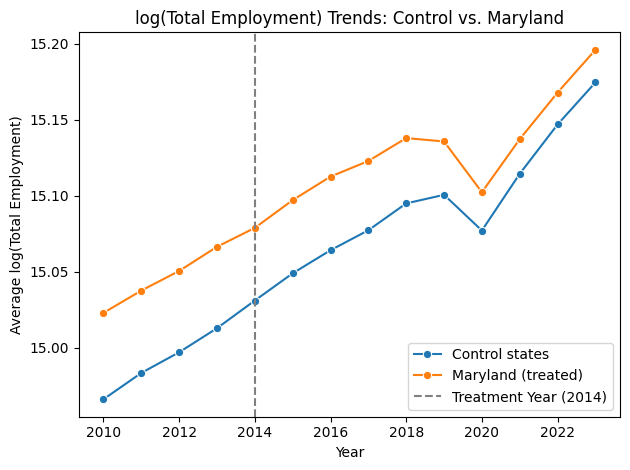

In [33]:
# get the average per year
trend_df = combined_df.groupby(["year", "treated"])["log_emp"].mean().reset_index()

# get labels for the plots
trend_df["group"] = trend_df["treated"].map(
    {1: "Maryland (treated)", 0: "Control states"}
)

# plot!
plt.figure()
sns.lineplot(data=trend_df, x="year", y="log_emp", hue="group", marker="o")

plt.axvline(x=2014, color="gray", linestyle="--", label="Treatment Year (2014)")
plt.title("log(Total Employment) Trends: Control vs. Maryland")
plt.ylabel("Average log(Total Employment)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

> Lets see each control state plotted individually

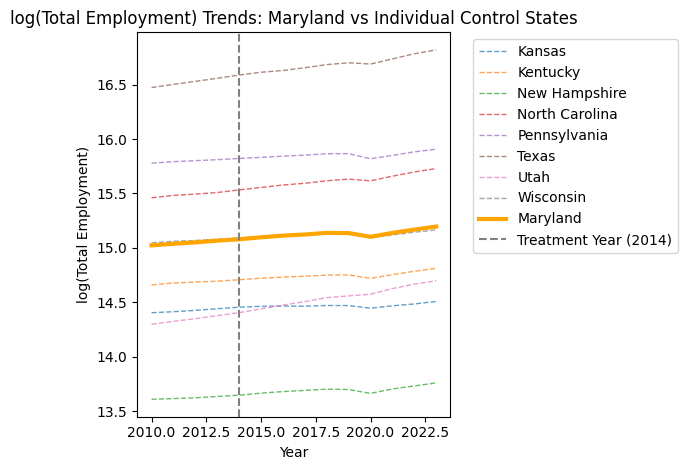

In [34]:
plt.figure()

# plot control states individually
for state in combined_df.query("treated == 0")["state"].unique():
    state_data = combined_df[(combined_df["state"] == state)]
    sns.lineplot(
        data=state_data,
        x="year",
        y="log_emp",
        label=state,
        linewidth=1,
        linestyle="--",
        alpha=0.7,
    )

# plot maryland
sns.lineplot(
    data=combined_df[combined_df["state"] == "Maryland"],
    x="year",
    y="log_emp",
    label="Maryland",
    color="orange",
    linewidth=3,
)

# add treatment line
plt.axvline(x=2014, color="gray", linestyle="--", label="Treatment Year (2014)")

plt.title("log(Total Employment) Trends: Maryland vs Individual Control States")
plt.ylabel("log(Total Employment)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

> lowkey maybe texas and new hampshire need to go

# Real per capita personal income
adjusted for inflation

In [35]:
# just get real per capita personal income
real_percap_income_df = employment_df = control_long[
    control_long["Description"].str.contains(
        "Real per capita personal income 4/", case=False, na=False
    )
].copy()

# rename so easier to understand
real_percap_income_df.rename(
    columns={"GeoName": "state", "value": "Real_per_capita_personal_income"},
    inplace=True,
)

real_percap_income_df.head()

,state,Description,Unit,year,Real_per_capita_personal_income
7,Kansas,Real per capita personal income 4/,Constant 2017 dollars,2010,47376.0
22,Kentucky,Real per capita personal income 4/,Constant 2017 dollars,2010,40634.0
37,New Hampshire,Real per capita personal income 4/,Constant 2017 dollars,2010,49949.0
52,North Carolina,Real per capita personal income 4/,Constant 2017 dollars,2010,42732.0
67,Pennsylvania,Real per capita personal income 4/,Constant 2017 dollars,2010,47012.0


> now we can merge with long_minwage_df

In [36]:
print(long_minwage_df.shape)
print(real_percap_income_df.shape)

(135, 3)
(135, 5)


In [37]:
percap_combined_df = pd.merge(
    long_minwage_df, real_percap_income_df, on=["state", "year"], how="inner"
)

In [38]:
percap_combined_df["treated"] = percap_combined_df["state"].apply(
    lambda x: 1 if x == "Maryland" else 0
)
percap_combined_df["post"] = percap_combined_df["year"].apply(
    lambda x: 1 if x >= 2014 else 0
)

percap_combined_df.head()

,state,year,min_wage,Description,Unit,Real_per_capita_personal_income,treated,post
0,Kansas,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,47376.0,0,0
1,Kentucky,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,40634.0,0,0
2,Maryland,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,50624.0,1,0
3,New Hampshire,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,49949.0,0,0
4,North Carolina,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,42732.0,0,0


In [39]:
percap_combined_df["Real_per_capita_personal_income"].dtype

dtype('O')

> similar issue as before, no data for 2024

In [41]:
# when i tried to run the regression below there was issues cuz of datatypes

# some arent numeric, lets force them to be
percap_combined_df["Real_per_capita_personal_income"] = pd.to_numeric(
    percap_combined_df["Real_per_capita_personal_income"], errors="coerce"
)

# 9 that are NA, also 9 states total in our dataset
print(percap_combined_df["Real_per_capita_personal_income"].isna().sum())

nan_rows = percap_combined_df[
    percap_combined_df["Real_per_capita_personal_income"].isna()
]
print(nan_rows)

9
              state  year min_wage                          Description  \
126          Kansas  2024     7.25   Real per capita personal income 4/   
127        Kentucky  2024     7.25   Real per capita personal income 4/   
128        Maryland  2024     15.0   Real per capita personal income 4/   
129   New Hampshire  2024     7.25   Real per capita personal income 4/   
130  North Carolina  2024     7.25   Real per capita personal income 4/   
131    Pennsylvania  2024     7.25   Real per capita personal income 4/   
132           Texas  2024     7.25   Real per capita personal income 4/   
133            Utah  2024     7.25   Real per capita personal income 4/   
134       Wisconsin  2024     7.25   Real per capita personal income 4/   

                      Unit  Real_per_capita_personal_income  treated  post  
126  Constant 2017 dollars                              NaN        0     1  
127  Constant 2017 dollars                              NaN        0     1  
128  Constant 20

In [42]:
# drop 2024 again
percap_combined_df = percap_combined_df.dropna(
    subset=["Real_per_capita_personal_income"]
)

### fit the model

In [43]:
model = smf.ols(
    "Real_per_capita_personal_income ~ treated + post + treated:post",
    data=percap_combined_df,
).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Real_per_capita_personal_income   R-squared:                       0.318
Model:                                         OLS   Adj. R-squared:                  0.301
Method:                              Least Squares   F-statistic:                     18.95
Date:                             Mon, 21 Apr 2025   Prob (F-statistic):           3.73e-10
Time:                                     18:41:49   Log-Likelihood:                -1249.9
No. Observations:                              126   AIC:                             2508.
Df Residuals:                                  122   BIC:                             2519.
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]